# Insurance Claims- Fraud Detection

Problem Statement:

Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
df=pd.read_csv(url)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.drop('_c39',inplace=True,axis=1)

In [8]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# Encoding the dataset

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [10]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [13]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_location                int64
incident_hour_of_the_day 

# Visualization of data

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

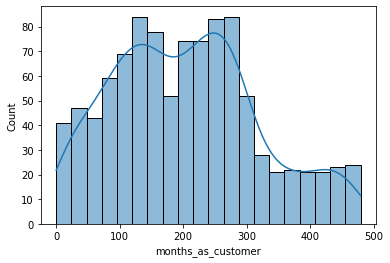

In [15]:
sns.histplot(x='months_as_customer',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

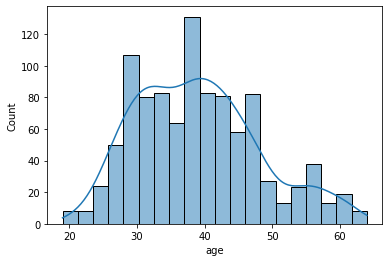

In [16]:
sns.histplot(x='age',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='policy_number', ylabel='Count'>

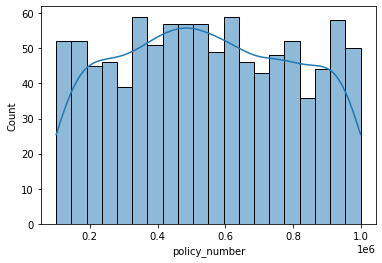

In [17]:
sns.histplot(x='policy_number',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='policy_bind_date', ylabel='Count'>

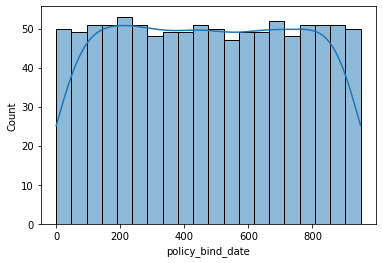

In [18]:
sns.histplot(x='policy_bind_date',data=df,bins=20,kde=True)

2    352
0    338
1    310
Name: policy_state, dtype: int64


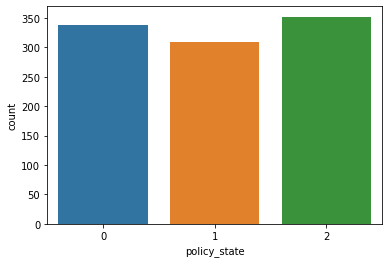

In [19]:
sns.countplot(x='policy_state',data=df)
print(df['policy_state'].value_counts())

1    351
0    349
2    300
Name: policy_csl, dtype: int64


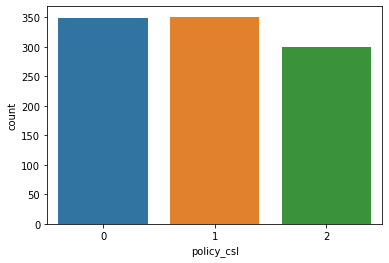

In [20]:
sns.countplot(x='policy_csl',data=df)
print(df['policy_csl'].value_counts())

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


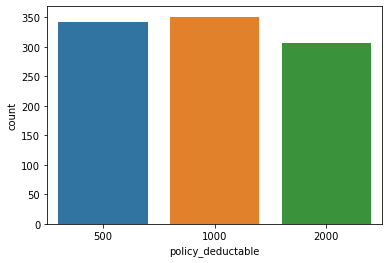

In [21]:
sns.countplot(x='policy_deductable',data=df)
print(df['policy_deductable'].value_counts())

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

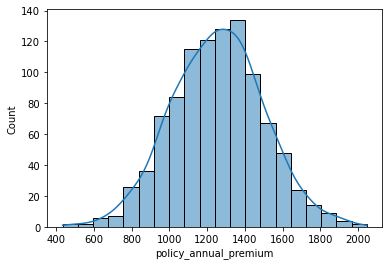

In [22]:
sns.histplot(x='policy_annual_premium',data=df,bins=20,kde=True)

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


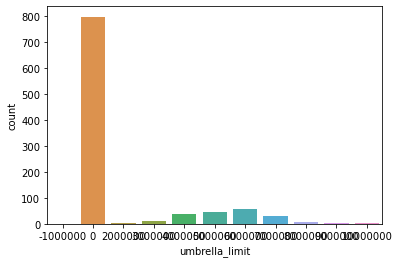

In [24]:
sns.countplot(x='umbrella_limit',data=df)
print(df['umbrella_limit'].value_counts())

<AxesSubplot:xlabel='insured_zip', ylabel='Count'>

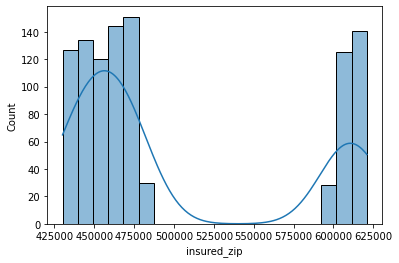

In [25]:
sns.histplot(x='insured_zip',data=df,bins=20,kde=True)

0    537
1    463
Name: insured_sex, dtype: int64


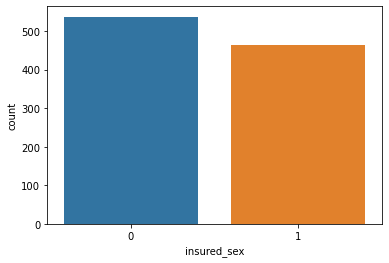

In [27]:
sns.countplot(x='insured_sex',data=df)
print(df['insured_sex'].value_counts())

3    161
2    160
0    145
4    144
5    143
6    125
1    122
Name: insured_education_level, dtype: int64


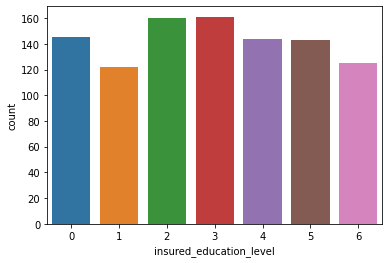

In [28]:
sns.countplot(x='insured_education_level',data=df)
print(df['insured_education_level'].value_counts())

<AxesSubplot:xlabel='insured_occupation', ylabel='Count'>

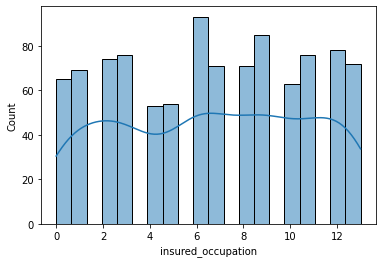

In [30]:
sns.histplot(x='insured_occupation',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='insured_hobbies', ylabel='Count'>

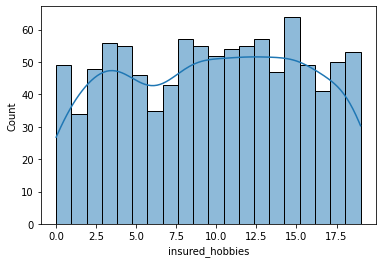

In [32]:
sns.histplot(x='insured_hobbies',data=df,bins=20,kde=True)

3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64


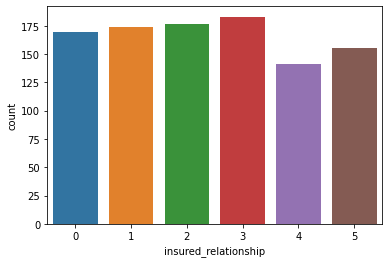

In [33]:
sns.countplot(x='insured_relationship',data=df)
print(df['insured_relationship'].value_counts())

<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

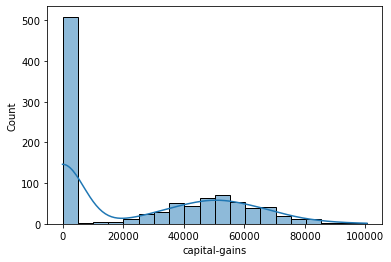

In [35]:
sns.histplot(x='capital-gains',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

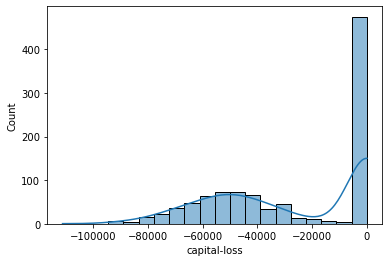

In [36]:
sns.histplot(x='capital-loss',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='incident_date', ylabel='Count'>

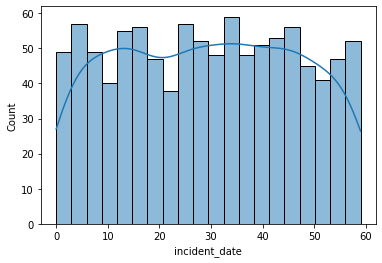

In [37]:
sns.histplot(x='incident_date',bins=20,kde=True,data=df)

0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64


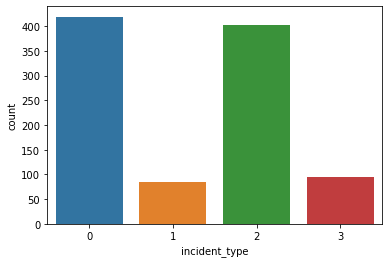

In [39]:
sns.countplot(x='incident_type',data=df)
print(df['incident_type'].value_counts())

2    292
3    276
1    254
0    178
Name: collision_type, dtype: int64


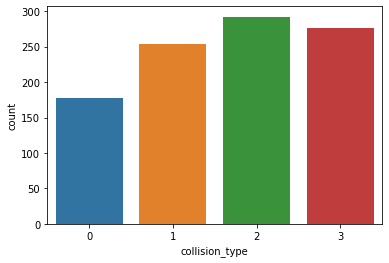

In [40]:
sns.countplot(x='collision_type',data=df)
print(df['collision_type'].value_counts())

In [41]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

1    354
2    280
0    276
3     90
Name: incident_severity, dtype: int64


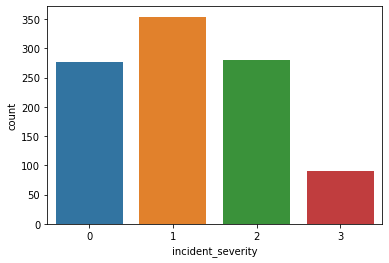

In [43]:
sns.countplot(x='incident_severity',data=df)
print(df['incident_severity'].value_counts())

4    292
1    223
3    198
0    196
2     91
Name: authorities_contacted, dtype: int64


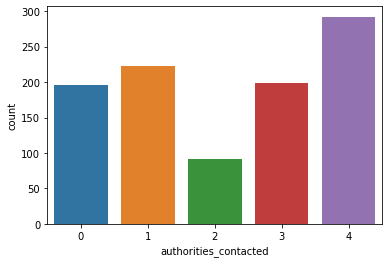

In [44]:
sns.countplot(x='authorities_contacted',data=df)
print(df['authorities_contacted'].value_counts())

1    262
4    248
6    217
5    110
0    110
3     30
2     23
Name: incident_state, dtype: int64


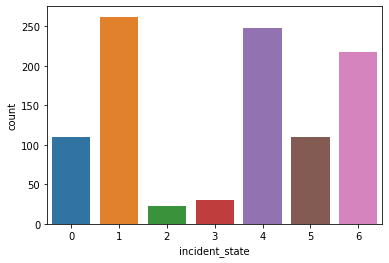

In [45]:
sns.countplot(x='incident_state',data=df)
print(df['incident_state'].value_counts())

6    157
0    152
1    149
3    145
2    141
5    134
4    122
Name: incident_city, dtype: int64


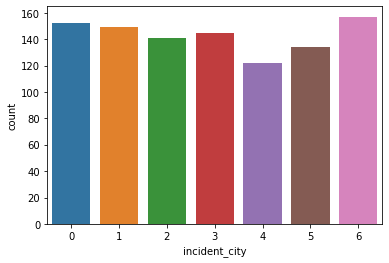

In [46]:
sns.countplot(x='incident_city',data=df)
print(df['incident_city'].value_counts())

<AxesSubplot:xlabel='incident_location', ylabel='Count'>

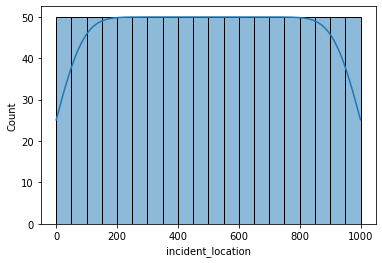

In [48]:
sns.histplot(x='incident_location',bins=20,kde=True,data=df)

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Count'>

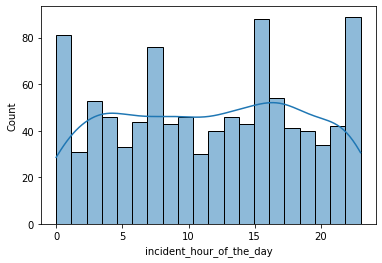

In [49]:
sns.histplot(x='incident_hour_of_the_day',bins=20,kde=True,data=df)

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


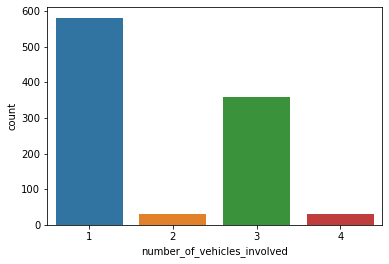

In [61]:
sns.countplot(x='number_of_vehicles_involved',data=df)
print(df['number_of_vehicles_involved'].value_counts())

0    360
1    338
2    302
Name: property_damage, dtype: int64


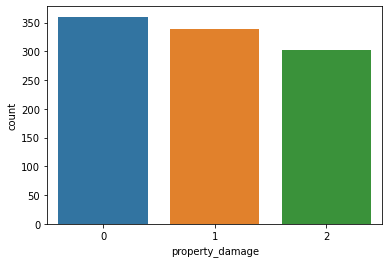

In [55]:
sns.countplot(x='property_damage',data=df)
print(df['property_damage'].value_counts())

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


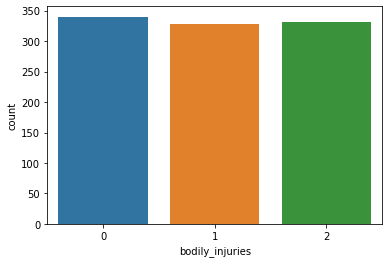

In [56]:
sns.countplot(x='bodily_injuries',data=df)
print(df['bodily_injuries'].value_counts())

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


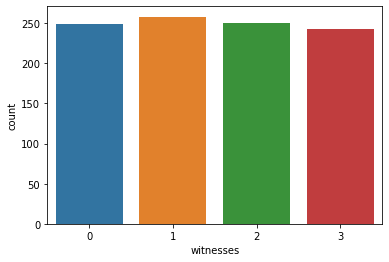

In [57]:
sns.countplot(x='witnesses',data=df)
print(df['witnesses'].value_counts())

1    343
0    343
2    314
Name: police_report_available, dtype: int64


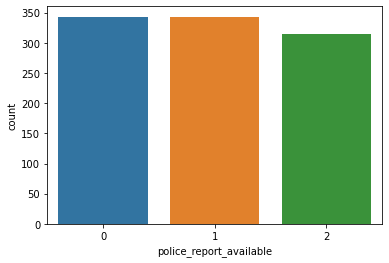

In [58]:
sns.countplot(x='police_report_available',data=df)
print(df['police_report_available'].value_counts())

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

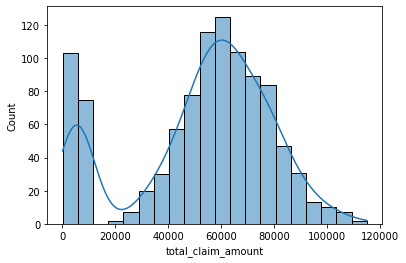

In [60]:
sns.histplot(x='total_claim_amount',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

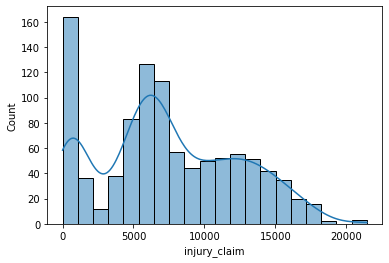

In [63]:
sns.histplot(x='injury_claim',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

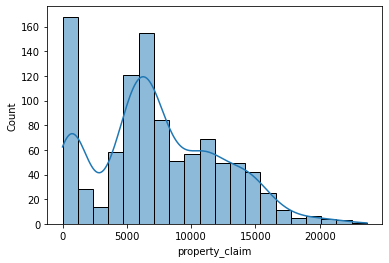

In [64]:
sns.histplot(x='property_claim',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

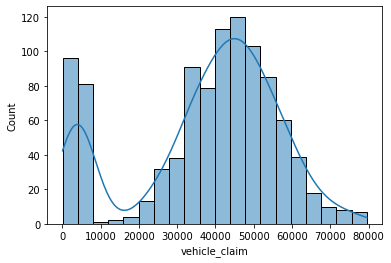

In [65]:
sns.histplot(x='vehicle_claim',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='auto_make', ylabel='Count'>

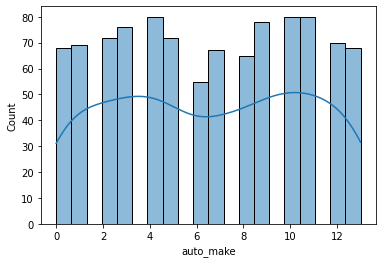

In [66]:
sns.histplot(x='auto_make',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='auto_model', ylabel='Count'>

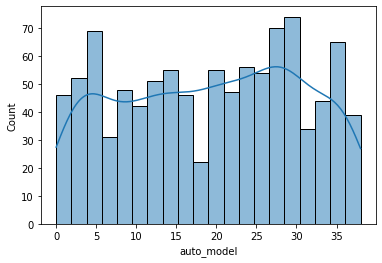

In [67]:
sns.histplot(x='auto_model',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='auto_year', ylabel='Count'>

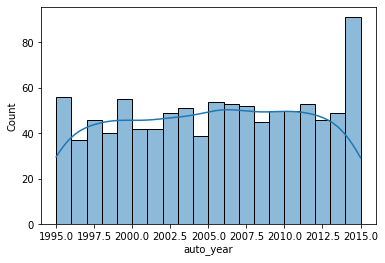

In [68]:
sns.histplot(x='auto_year',data=df,bins=20,kde=True)

0    753
1    247
Name: fraud_reported, dtype: int64


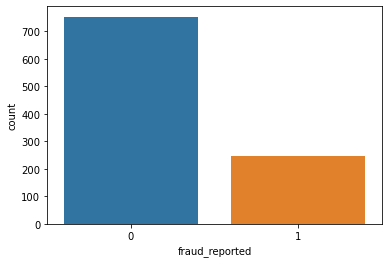

In [69]:
sns.countplot(x='fraud_reported',data=df)
print(df['fraud_reported'].value_counts())

# Describing datasets

In [71]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


<AxesSubplot:>

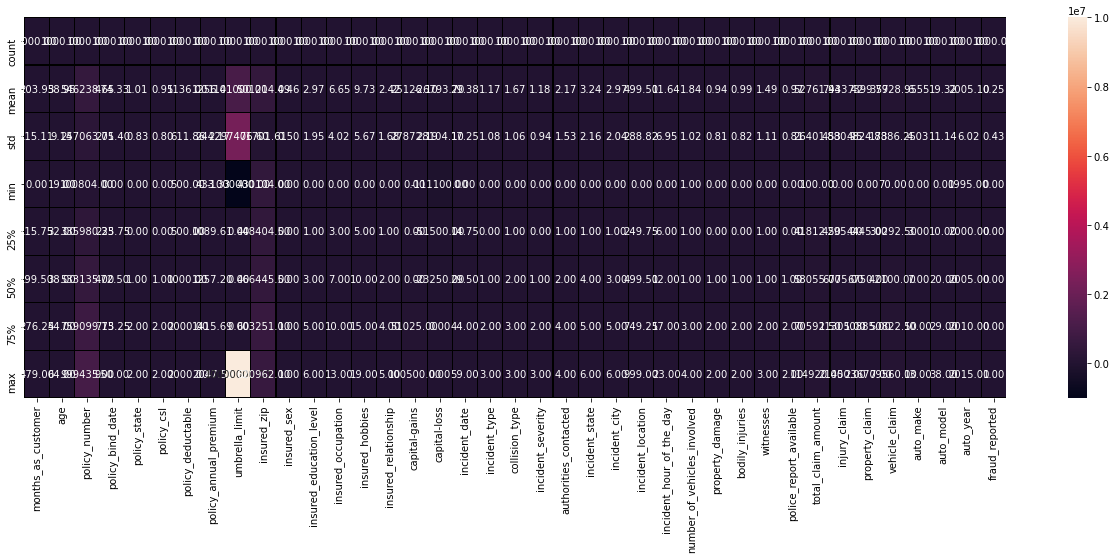

In [74]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidth=0.1,fmt='0.2f')

In [75]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


<AxesSubplot:>

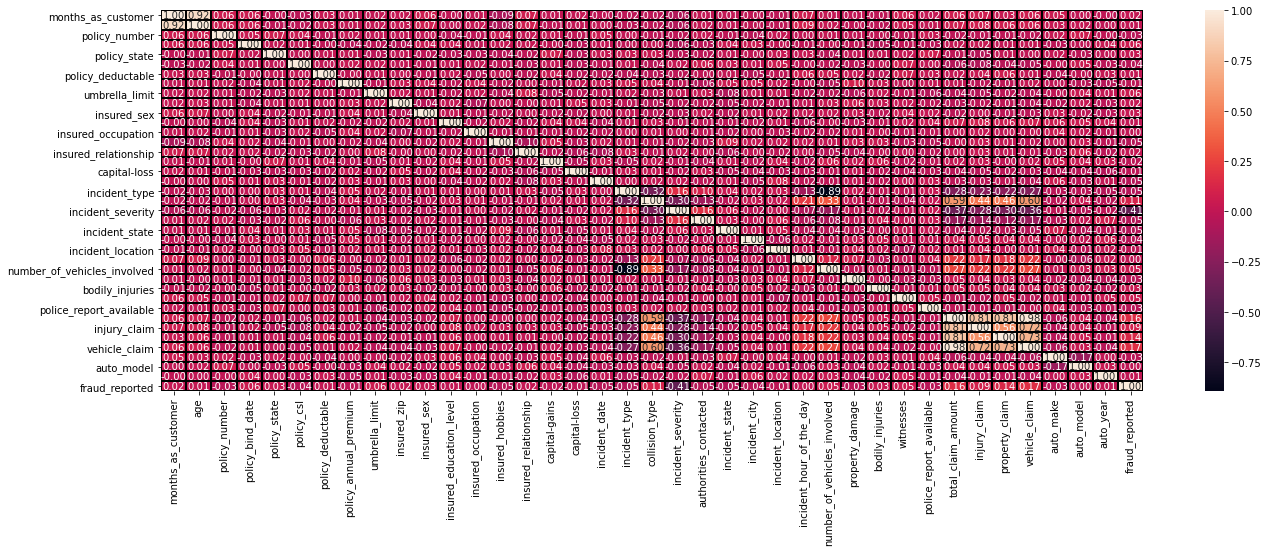

In [79]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),linecolor='black',linewidth=0.1,fmt='0.2f',annot=True)

# Outliers checking

In [80]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


-/+ 0.5 as the threshold

<AxesSubplot:>

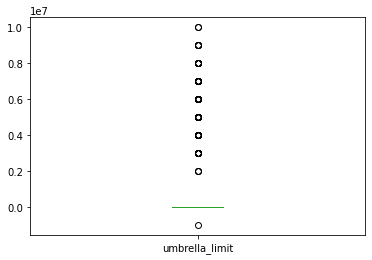

In [81]:
df['umbrella_limit'].plot.box()

<AxesSubplot:>

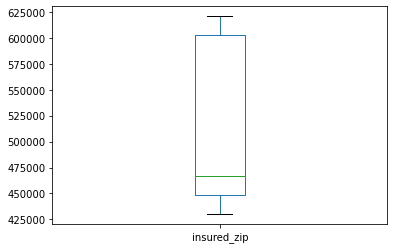

In [82]:
df['insured_zip'].plot.box()

<AxesSubplot:>

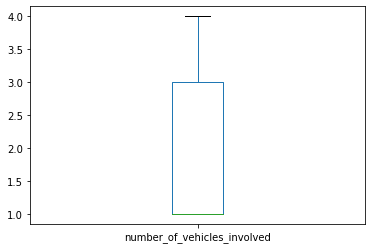

In [83]:
df['number_of_vehicles_involved'].plot.box()

<AxesSubplot:>

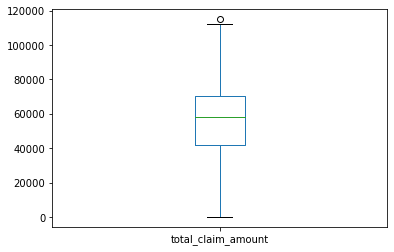

In [84]:
df['total_claim_amount'].plot.box()

<AxesSubplot:>

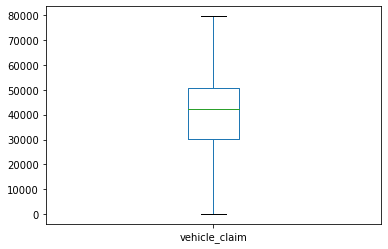

In [85]:
df['vehicle_claim'].plot.box()

<AxesSubplot:>

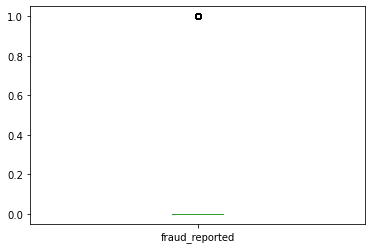

In [86]:
df['fraud_reported'].plot.box()

# Outliers removal

In [88]:
df.shape

(1000, 39)

In [89]:
from scipy.stats import zscore
import numpy as np

In [90]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975]),
 array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
         8,  8,  8]))

In [91]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


Percentage data loss

In [92]:
Data_loss=((1000-980)/1000)*100
Data_loss

2.0

# Separating data in x and y

In [93]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

# Transforming data

In [94]:
from sklearn.preprocessing import power_transform


In [95]:
x=power_transform(x,method='yeo-johnson')
x

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 1.05127872,  1.00873272, -0.02315574, ...,  0.85911096,
        -1.80834465, -0.19745541],
       [ 0.30453584,  0.43143333, -0.74529151, ...,  0.41861586,
        -0.58622515,  0.30262249],
       [-0.51122603, -1.13951302,  0.58793118, ..., -0.55514878,
         0.94490524,  0.30262249],
       ...,
       [-0.54970642, -0.47044379,  1.37330822, ...,  1.07113608,
         0.04546316, -1.49627768],
       [ 1.9126537 ,  2.13055434,  0.02397688, ..., -1.44076333,
        -1.30534129, -1.17624558],
       [ 1.90009963,  1.98572613,  0.10769485, ...,  0.41861586,
        -0.58622515,  0.30262249]])

In [96]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [97]:
x=mms.fit_transform(x)
x

array([[0.7769837 , 0.75464753, 0.53623559, ..., 0.81089244, 0.04433035,
        0.43814043],
       [0.60911735, 0.64244311, 0.33429149, ..., 0.67705776, 0.39181688,
        0.58845023],
       [0.42573566, 0.33711257, 0.70712505, ..., 0.38120092, 0.8271648 ,
        0.58845023],
       ...,
       [0.41708534, 0.46715347, 0.92675446, ..., 0.87531159, 0.57142548,
        0.04774982],
       [0.97061913, 0.97268579, 0.54941615, ..., 0.11212653, 0.18734983,
        0.14394275],
       [0.967797  , 0.94453685, 0.57282774, ..., 0.67705776, 0.39181688,
        0.58845023]])

In [98]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)

At random state 76 The model performs very well
At random state :- 76
Training accuracy_score is :- 79.5
Testing accuracy_score is :- 79.5
At random state 79 The model performs very well
At random state :- 79
Training accuracy_score is :- 80.0
Testing accuracy_score is :- 80.0
At random state 254 The model performs very well
At random state :- 254
Training accuracy_score is :- 80.0
Testing accuracy_score is :- 80.0
At random state 260 The model performs very well
At random state :- 260
Training accuracy_score is :- 80.5
Testing accuracy_score is :- 80.5
At random state 379 The model performs very well
At random state :- 379
Training accuracy_score is :- 80.5
Testing accuracy_score is :- 80.5
At random state 411 The model performs very well
At random state :- 411
Training accuracy_score is :- 80.5
Testing accuracy_score is :- 80.5
At random state 585 The model performs very well
At random state :- 585
Training accuracy_score is :- 81.0
Testing accuracy_score is :- 81.0
At random state 6

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [107]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dtc.fit(x_train,y_train)
    preddtc_train=dtc.predict(x_train)
    preddtc_test=dtc.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)

At random state 63 The model performs very well
At random state :- 63
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 89 The model performs very well
At random state :- 89
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 109 The model performs very well
At random state :- 109
Training accuracy_score is :- 71.5
Testing accuracy_score is :- 71.5
At random state 132 The model performs very well
At random state :- 132
Training accuracy_score is :- 71.5
Testing accuracy_score is :- 71.5
At random state 338 The model performs very well
At random state :- 338
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 436 The model performs very well
At random state :- 436
Training accuracy_score is :- 69.5
Testing accuracy_score is :- 69.5
At random state 505 The model performs very well
At random state :- 505
Training accuracy_score is :- 69.5
Testing accuracy_score is :- 69.5
At random state 5

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    predknn_train=knn.predict(x_train)
    predknn_test=knn.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)


At random state 63 The model performs very well
At random state :- 63
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 89 The model performs very well
At random state :- 89
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 109 The model performs very well
At random state :- 109
Training accuracy_score is :- 71.5
Testing accuracy_score is :- 71.5
At random state 132 The model performs very well
At random state :- 132
Training accuracy_score is :- 71.5
Testing accuracy_score is :- 71.5
At random state 338 The model performs very well
At random state :- 338
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 436 The model performs very well
At random state :- 436
Training accuracy_score is :- 69.5
Testing accuracy_score is :- 69.5
At random state 505 The model performs very well
At random state :- 505
Training accuracy_score is :- 69.5
Testing accuracy_score is :- 69.5
At random state 5

In [108]:
from sklearn.naive_bayes import MultinomialNB


In [109]:
mnb=MultinomialNB()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mnb.fit(x_train,y_train)
    predmnb_train=mnb.predict(x_train)
    predmnb_test=mnb.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)



At random state 63 The model performs very well
At random state :- 63
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 89 The model performs very well
At random state :- 89
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 109 The model performs very well
At random state :- 109
Training accuracy_score is :- 71.5
Testing accuracy_score is :- 71.5
At random state 132 The model performs very well
At random state :- 132
Training accuracy_score is :- 71.5
Testing accuracy_score is :- 71.5
At random state 338 The model performs very well
At random state :- 338
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 436 The model performs very well
At random state :- 436
Training accuracy_score is :- 69.5
Testing accuracy_score is :- 69.5
At random state 505 The model performs very well
At random state :- 505
Training accuracy_score is :- 69.5
Testing accuracy_score is :- 69.5
At random state 5

In [110]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    svc.fit(x_train,y_train)
    predsvc_train=svc.predict(x_train)
    predsvc_test=svc.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training accuracy_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is :-",accuracy_score(y_test,pred_test)*100)


At random state 63 The model performs very well
At random state :- 63
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 89 The model performs very well
At random state :- 89
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 109 The model performs very well
At random state :- 109
Training accuracy_score is :- 71.5
Testing accuracy_score is :- 71.5
At random state 132 The model performs very well
At random state :- 132
Training accuracy_score is :- 71.5
Testing accuracy_score is :- 71.5
At random state 338 The model performs very well
At random state :- 338
Training accuracy_score is :- 70.5
Testing accuracy_score is :- 70.5
At random state 436 The model performs very well
At random state :- 436
Training accuracy_score is :- 69.5
Testing accuracy_score is :- 69.5
At random state 505 The model performs very well
At random state :- 505
Training accuracy_score is :- 69.5
Testing accuracy_score is :- 69.5
At random state 5

We will select Logistic regression as our model as it gives the best result

# Cross validation

In [111]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv :- ",j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv :-  2
Cross validation score is :- 77.0
accuracy_score is :- 74.5


At cv :-  3
Cross validation score is :- 76.99945454436472
accuracy_score is :- 74.5


At cv :-  4
Cross validation score is :- 78.1
accuracy_score is :- 74.5


At cv :-  5
Cross validation score is :- 77.60000000000001
accuracy_score is :- 74.5


At cv :-  6
Cross validation score is :- 77.70182526513238
accuracy_score is :- 74.5


At cv :-  7
Cross validation score is :- 77.70046854553895
accuracy_score is :- 74.5


At cv :-  8
Cross validation score is :- 76.9
accuracy_score is :- 74.5


At cv :-  9
Cross validation score is :- 77.70359645359646
accuracy_score is :- 74.5




In [112]:
lsscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("The cv score is: ",lsscore_selected,"\n The accuracy_score is: ",lss)

The cv score is:  0.77 
 The accuracy_score is:  0.745


# AUC ROC Curve

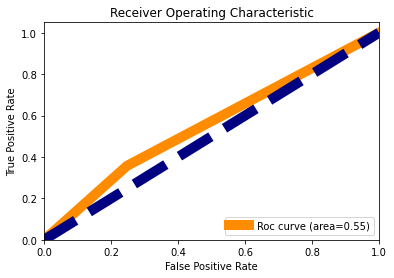

In [113]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Model Saving

In [114]:
import pickle
filename='Insurance.pk1'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [115]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com
                    

,original,predicted
0,0,0
1,0,1
2,0,0
3,1,0
4,0,0
...,...,...
195,1,0
196,0,0
197,0,0
198,1,0
